In [ ]:
import pandas as pd
df = pd.read_csv('../DataSets/FORTEBANK_tires.csv')
df

In [2]:
df.isna().sum()

Tire Name       2
Brand           2
Price        2346
Season          2
Spikes          2
Diameter        2
High            5
Width          78
dtype: int64

In [3]:
for col in df.columns:
    print(col, df[col].dtype)
    print(df[col].unique())

Tire Name object
['Шина Viatti V-522 Brina Nordico 205/55 R16 91T зимняя'
 'Шина Yokohama ES32 215/55 R17 94V летняя'
 'Шина Viatti Brina V-521 185/55 R15 82T зимняя' ...
 'Шина Nankang WS-1 265/70 R18 116Q зимняя'
 'Шина Viatti Bosco Nordico V-523 235/60 R18 103T зимняя'
 'Шина Tigar Winter 185/65 R15 88T зимняя']
Brand object
['Viatti' 'Yokohama' 'Cordiant' 'Pirelli' 'Roadx' 'Nexen' 'Delmax'
 'Nokian' 'Кама' 'Mazzini' 'Continental' 'Goodyear' 'Doublestar'
 'Goodride' 'Matador' 'Kumho' 'Bridgestone' 'Nankang' 'Toyo' 'Riken' '50'
 'BFGoodrich' 'Hankook' 'Tigar' 'Michelin' 'Triangle' 'Kapsen' 'Sailun'
 'NorTec' 'Nordman' 'Roadstone' 'ОШЗ' 'Formula' 'Autogreen' 'Haida'
 'Blackhawk' 'Forward' '55' 'Maxxis' '65' 'Dunlop' 'Landsail' 'Federal'
 'Davanti' 'Lassa' 'Comforser' 'Gislaved' 'Tunga' 'Белшина' 'Laufenn'
 'Зимние' 'Nitto' 'Летние' '70' 'Onyx' 'Arivo' 'Rosava' 'Trazano' nan
 'Firestone' 'Boto' 'Winda' 'Aoteli' 'Mirage' 'General' 'Hifly' 'Ovation'
 'БШЗ' '60' 'Starmaxx' 'Волтайр' 'Всес

In [4]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('../DataSets/FORTEBANK_tires.csv')

# Fill null values for "brand" with the mode
drop_values_brand = ['50', '60', '55', '65']
df = df[~df['Brand'].isin(drop_values_brand)]
df['Brand'].fillna(df['Brand'].mode()[0], inplace=True)

# Fill null values for "price" with the mean
df['Price'].fillna(df['Price'].mean(), inplace=True)

# Create dummy columns for "season" and fill null values
df['Season'].fillna(method='ffill', inplace=True)
drop_values = ['Bridgestone', 'Dunlop', 'R16', 'R14', 'R17', 'Sailun', 'Triangle']
df = df[~df['Season'].isin(drop_values)]
df['Season'].replace({'Нет': 'Летние', 'Есть': 'Зимние'}, inplace=True)
df = pd.get_dummies(df, columns=['Season'], dummy_na=True, prefix='Season')

# Fill null values for "spikes" based on "season"
df.loc[df['Season_Зимние'] == 1, 'Spikes'].fillna('Есть', inplace=True)
df.loc[df['Season_Летние'] == 1, 'Spikes'].fillna('Нет', inplace=True)
df.loc[df['Season_Всесезонные'] == 1, 'Spikes'].fillna('Нет', inplace=True)


df['Spikes'] = df['Spikes'].map({'Есть': 1, 'Нет': 0})

# Fill null values for "diameter", "high", and "width" with ffill
df['Diameter'].fillna(method='ffill', inplace=True)
df['Diameter'] = df['Diameter'].str.extract('(\d+)').astype(float)

df['High'].fillna(method='ffill', inplace=True)
df['High'] = pd.to_numeric(df['High'], errors='coerce').fillna(13.5)

df['Width'].fillna(method='ffill', inplace=True)
df['Width'] = pd.to_numeric(df['Width'], errors='coerce')

# Save the preprocessed DataFrame to a new CSV file
df = df.dropna()
df.isna().sum()

df.to_csv('../DataSets/FORTEBANK_tires_preprocessed.csv', index=False)
df.isna().sum()

Tire Name             0
Brand                 0
Price                 0
Spikes                0
Diameter              0
High                  0
Width                 0
Season_Всесезонные    0
Season_Зимние         0
Season_Летние         0
Season_nan            0
dtype: int64

In [5]:
for col in df.columns:
    print(col, df[col].dtype)
    print(df[col].unique())

Tire Name object
['Шина Viatti V-522 Brina Nordico 205/55 R16 91T зимняя'
 'Шина Yokohama ES32 215/55 R17 94V летняя'
 'Шина Viatti Brina V-521 185/55 R15 82T зимняя' ...
 'Шина Nankang WS-1 265/70 R18 116Q зимняя'
 'Шина Viatti Bosco Nordico V-523 235/60 R18 103T зимняя'
 'Шина Tigar Winter 185/65 R15 88T зимняя']
Brand object
['Viatti' 'Yokohama' 'Cordiant' 'Pirelli' 'Roadx' 'Nexen' 'Delmax'
 'Nokian' 'Кама' 'Mazzini' 'Continental' 'Goodyear' 'Doublestar'
 'Goodride' 'Matador' 'Kumho' 'Bridgestone' 'Nankang' 'Toyo' 'Riken'
 'BFGoodrich' 'Hankook' 'Tigar' 'Michelin' 'Triangle' 'Kapsen' 'Sailun'
 'NorTec' 'Nordman' 'Roadstone' 'ОШЗ' 'Formula' 'Autogreen' 'Haida'
 'Blackhawk' 'Forward' 'Maxxis' 'Dunlop' 'Landsail' 'Federal' 'Davanti'
 'Lassa' 'Comforser' 'Gislaved' 'Tunga' 'Белшина' 'Laufenn' 'Nitto' 'Onyx'
 'Arivo' 'Rosava' 'Trazano' 'Firestone' 'Boto' 'Winda' 'Aoteli' 'Mirage'
 'General' 'Hifly' 'Ovation' 'БШЗ' 'Волтайр' 'Contyre' 'Joyroad'
 'General Tire' 'Kormoran' 'Farroad' 'Sava' 

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score

# Assuming the dataset is in a CSV file named 'tire_dataset.csv'
df = pd.read_csv('FORTEBANK_tires_preprocessed.csv')

# Assuming the dataset has columns as provided in the user's input
X = df.drop(['Tire Name', 'Brand', 'Price'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict prices on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 939167623.2409619


In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Assume you want to create three price classes: Low, Medium, and High
price_bins = [0, 30000, 60000, float('inf')]
price_labels = ['Low', 'Medium', 'High']

# Read the dataset
# Create a DataFrame
df = pd.read_csv('FORTEBANK_tires_preprocessed.csv')
# Create price classes
df['PriceClass'] = pd.cut(df['Price'], bins=price_bins, labels=price_labels, right=False)

# Select features and target
X = df.drop(['Tire Name', 'Brand', 'Price', 'PriceClass'], axis=1)
y = df['PriceClass']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict price classes on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.7096505823627288
Confusion Matrix:
[[672  31  76]
 [ 22  77  32]
 [158  30 104]]


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Define a list of classifiers
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier()
]

# Initialize dictionaries to store results
accuracy_results = {}
conf_matrix_results = {}

# Iterate through classifiers
for clf in classifiers:
    # Train the classifier
    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store results in dictionaries
    accuracy_results[str(clf)] = accuracy
    conf_matrix_results[str(clf)] = conf_matrix

# Find the model with the best accuracy
best_model = max(accuracy_results, key=accuracy_results.get)

# Print results for all models
for clf, acc in accuracy_results.items():
    print(f'{clf} Accuracy: {acc}')
    print('Confusion Matrix:')
    print(conf_matrix_results[clf])
    print()

# Print the best model
print(f'The best model is {best_model} with an accuracy of {accuracy_results[best_model]}')
print('Confusion Matrix:')
print(conf_matrix_results[best_model])

DecisionTreeClassifier() Accuracy: 0.7096505823627288
Confusion Matrix:
[[672  31  76]
 [ 22  77  32]
 [158  30 104]]

RandomForestClassifier() Accuracy: 0.71630615640599
Confusion Matrix:
[[670  34  75]
 [ 18  81  32]
 [150  32 110]]

SVC() Accuracy: 0.6564059900166389
Confusion Matrix:
[[758  21   0]
 [100  31   0]
 [279  13   0]]

KNeighborsClassifier() Accuracy: 0.7013311148086523
Confusion Matrix:
[[667  29  83]
 [ 27  74  30]
 [158  32 102]]

The best model is RandomForestClassifier() with an accuracy of 0.71630615640599
Confusion Matrix:
[[670  34  75]
 [ 18  81  32]
 [150  32 110]]


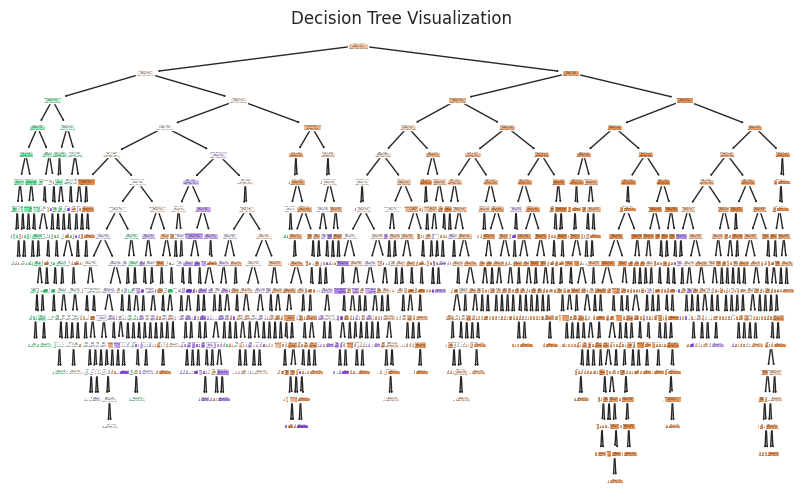

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming DecisionTreeClassifier is the first classifier in your list
decision_tree_clf = classifiers[0]

# Train the Decision Tree classifier
decision_tree_clf.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(decision_tree_clf, filled=True, feature_names=list(X_train.columns))
plt.title("Decision Tree Visualization")
plt.show()


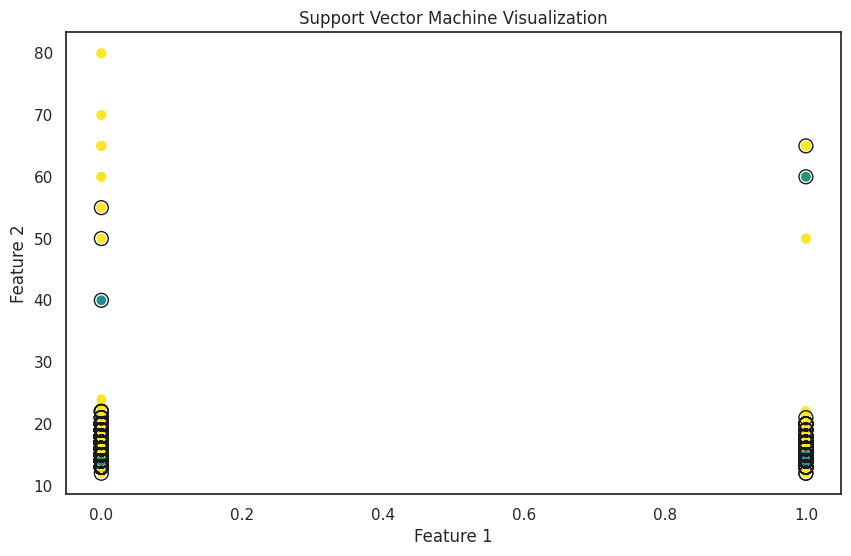

In [20]:
# Assuming SVM is the third classifier in your list
svm_clf = classifiers[2]

# Convert categorical labels to numerical labels for visualization
label_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
y_train_numeric = y_train.map(label_mapping)

# Visualize the data points and support vectors
plt.figure(figsize=(10, 6))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train_numeric, cmap='viridis')
plt.scatter(X_train.iloc[svm_clf.support_, 0], X_train.iloc[svm_clf.support_, 1], s=100, facecolors='none', edgecolors='k')
plt.title("Support Vector Machine Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


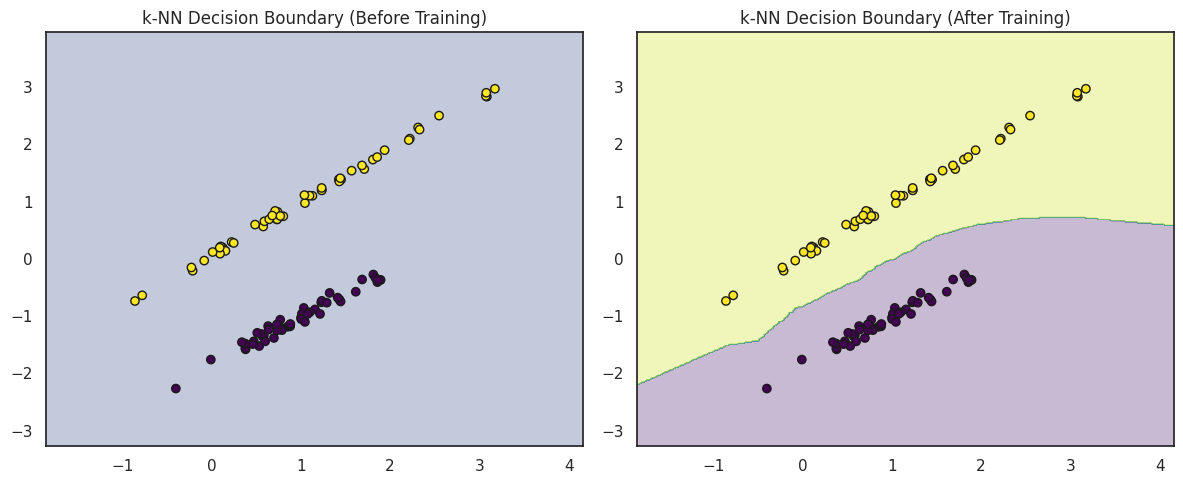

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

# Create a synthetic dataset with adjusted parameters
n_samples = 100
n_features = 2
n_informative = 2  # Set to 2 or less to avoid the error
n_redundant = 0
n_classes = 2
n_clusters_per_class = 1

# Generate synthetic dataset
X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    n_redundant=n_redundant,
    n_classes=n_classes,
    n_clusters_per_class=n_clusters_per_class,
    random_state=42
)

# Plot the dataset before training the k-NN model
plt.figure(figsize=(12, 5))

# Plot the decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, np.zeros_like(xx), cmap='viridis', alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title("k-NN Decision Boundary (Before Training)")

# Train the k-NN classifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X, y)

# Plot the decision boundary after training the k-NN model
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, knn_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), cmap='viridis', alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title("k-NN Decision Boundary (After Training)")

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Assuming 'best_model' is a string representing the name of the best model
best_model_instance = classifiers[best_model]

# Visualize Decision Tree
if isinstance(best_model_instance, DecisionTreeClassifier):
    plt.figure(figsize=(20, 10))
    plot_tree(best_model_instance, filled=True, feature_names=X_train.columns, class_names=True, rounded=True)
    plt.title("Decision Tree Visualization")
    plt.show()

# Visualize Random Forest Classifier
elif isinstance(best_model_instance, RandomForestClassifier):
    # Assuming n_estimators > 1, if n_estimators == 1, visualizing one tree might be sufficient
    for i in range(min(3, best_model_instance.n_estimators)):  # Visualize up to 3 trees
        plt.figure(figsize=(20, 10))
        plot_tree(best_model_instance.estimators_[i], filled=True, feature_names=X_train.columns, class_names=True, rounded=True)
        plt.title(f"Random Forest - Tree {i+1} Visualization")
        plt.show()

# Visualize Confusion Matrix for the best model
y_pred = best_model_instance.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for {best_model} Model')
plt.colorbar()

# Add labels to the plot
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations to the heatmap cells
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment="center", color="white" if conf_matrix[i, j] > (conf_matrix.max() / 2) else "black")

plt.show()